In [60]:
import pandas as pd

In [61]:
file_path='/content/Banglore_traffic_Dataset (1).csv'
traffic_data = pd.read_csv(file_path)

traffic_data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initial data exploration to check for null values and data types
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [63]:
# Check for any missing values
missing_values = traffic_data.isnull().sum()

missing_values

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [64]:
# Encoding categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Area Name', 'Road/Intersection Name', 'Weather Conditions', 'Roadwork and Construction Activity']

# Apply Label Encoding
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    traffic_data[column] = label_encoders[column].fit_transform(traffic_data[column])

In [65]:
# Splitting the data into features (X) and target (y)
X = traffic_data.drop(['Date', 'Traffic Volume'], axis=1)  # Dropping Date as it won't be directly used in modeling
y = traffic_data['Traffic Volume']

In [66]:
# Scaling features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets to confirm the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((7148, 14), (1788, 14), (7148,), (1788,))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the CNN model architecture
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(14, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 12, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,705 (65.25 KB)

 Trainable params: 16,705 (65.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Training the CNN model
history = cnn_model.fit(
    X_train,              # Training features
    y_train,              # Training labels (target)
    validation_data=(X_test, y_test),  # Validation data
    epochs=50,            # Number of epochs
    batch_size=32,        # Number of samples per batch
    verbose=1             # Show progress
)

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 909598656.0000 - mae: 26789.1621 - val_loss: 118985312.0000 - val_mae: 8724.0840
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 102186584.0000 - mae: 8219.7266 - val_loss: 75085184.0000 - val_mae: 6822.5283
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 67223832.0000 - mae: 6518.0972 - val_loss: 52307776.0000 - val_mae: 5563.0684
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 49535880.0000 - mae: 5509.6875 - val_loss: 43447408.0000 - val_mae: 5056.5112
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 40532888.0000 - mae: 4979.2109 - val_loss: 35793540.0000 - val_mae: 4507.5869
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34687092.0000 - mae: 4624.6753 - val_loss: 27667476.0000 - val_mae: 3988.9966
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24927052.0000 - mae: 3899.4988 - val_loss: 21013466.0000 - val_mae: 3464.1675
Epoch 8/50
224/224 ━━━━━━━━━━━

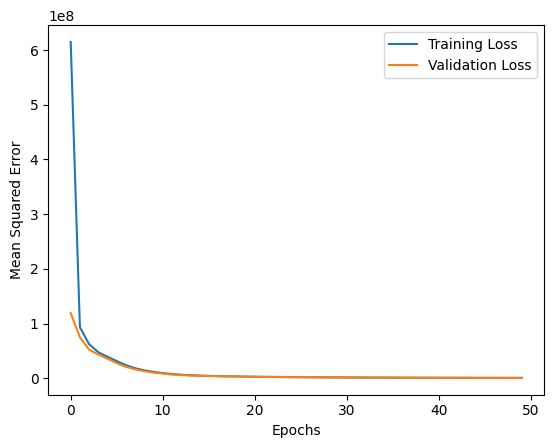

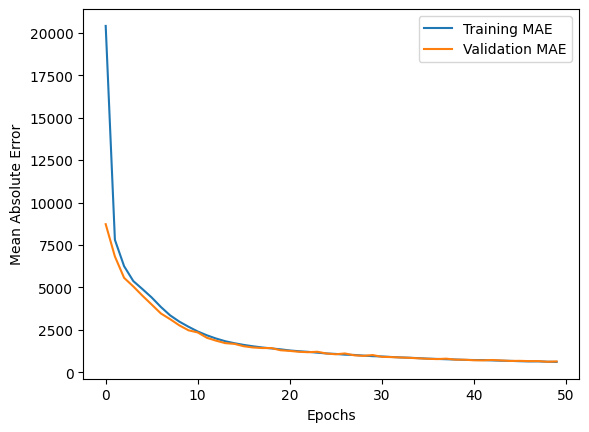

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [47]:
y_pred_cnn = cnn_model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:
# Evaluate the model on the test set
test_loss, test_mae = cnn_model.evaluate(X_test, y_test, verbose=1)

print(f"Test Mean Squared Error (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 733062.3750 - mae: 644.5773
Test Mean Squared Error (MSE): 727759.875
Test Mean Absolute Error (MAE): 640.2122192382812


In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Get predictions on the test set
y_pred = cnn_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-Squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean Squared Error (RMSE): 853.0884332822711
R-Squared (R²): 0.9956629276275635


In [50]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Initializing and training the Support Vector Regression model
svr_model = SVR(kernel='rbf')  # RBF kernel is commonly used for regression tasks
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluating the SVR model using common regression metrics
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

svr_mae, svr_mse, svr_r2

# Save the trained model
joblib.dump(svr_model, '/content/svr_model.joblib')

['/content/svr_model.joblib']

In [51]:
# Converting X_train back into a DataFrame with column names for compatibility in merging with y_train
X_train_df = pd.DataFrame(X_train, columns=X.columns).reset_index(drop=True)
y_train_df = y_train.reset_index(drop=True)

# Reattaching the target variable (Traffic Volume) to create a complete dataset
historical_averages_df = X_train_df.copy()
historical_averages_df['Traffic Volume'] = y_train_df

# Grouping by Area Name and Road/Intersection Name to calculate historical averages
# As we are working with encoded data, we will group by these encoded values
ha_model_df = historical_averages_df.groupby(['Area Name', 'Road/Intersection Name'])['Traffic Volume'].mean()

# Adjusting prediction function for HA model
def predict_ha(X_test_df, ha_model_df):
    y_pred_ha = []
    for _, row in X_test_df.iterrows():
        # Using tuple indexing to locate specific historical averages or a default if not found
        avg_value = ha_model_df.get((row['Area Name'], row['Road/Intersection Name']), y_train.mean())
        y_pred_ha.append(avg_value)
    return y_pred_ha

# Predicting traffic volume on the test set using HA model
y_pred_ha = predict_ha(pd.DataFrame(X_test, columns=X.columns), ha_model_df)

# Evaluating the HA model
ha_mae = mean_absolute_error(y_test, y_pred_ha)
ha_mse = mean_squared_error(y_test, y_pred_ha)
ha_r2 = r2_score(y_test, y_pred_ha)

ha_mae, ha_mse, ha_r2
joblib.dump(ha_model_df, '/content/ha_model.joblib')

['/content/ha_model.joblib']

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

# Reshaping data for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Defining the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Training the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Predicting with the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluating the LSTM model
lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_mse = mean_squared_error(y_test, y_pred_lstm)
lstm_r2 = r2_score(y_test, y_pred_lstm)

print("LSTM Model Evaluation:")
print(f"MAE: {lstm_mae}")
print(f"MSE: {lstm_mse}")
print(f"R²: {lstm_r2}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1030241152.0000 - val_loss: 1035359296.0000
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1012849856.0000 - val_loss: 1032011008.0000
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1018967552.0000 - val_loss: 1026462272.0000
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 993643776.0000 - val_loss: 1019109568.0000
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1010635328.0000 - val_loss: 1010394816.0000
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 994982208.0000 - val_loss: 1000127744.0000
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 972037632.0000 - val_loss: 988596608.0000
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 975304640.0000 - val_loss: 975985792.0000
Epoch 9/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 956594816.0000 - val_loss: 962297024.0000
Epoch 10/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 946267072.0000 - val_l

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjusting timesteps to 3 (can be tuned further if needed)
timesteps = 3

# Reshaping data to include multiple timesteps
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building a tuned LSTM model
lstm_model_tuned = Sequential()
lstm_model_tuned.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(timesteps, X_train_lstm.shape[2])))
lstm_model_tuned.add(Dropout(0.2))  # Adding dropout to prevent overfitting
lstm_model_tuned.add(LSTM(50, activation='relu'))
lstm_model_tuned.add(Dense(1))
lstm_model_tuned.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Training the model with increased epochs and modified batch size
history = lstm_model_tuned.fit(X_train_lstm, y_train, epochs=50, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)

# Making predictions
y_pred_lstm_tuned = lstm_model_tuned.predict(X_test_lstm)

# Evaluating the tuned model
lstm_mae_tuned = mean_absolute_error(y_test, y_pred_lstm_tuned)
lstm_mse_tuned = mean_squared_error(y_test, y_pred_lstm_tuned)
lstm_r2_tuned = r2_score(y_test, y_pred_lstm_tuned)

print("Tuned LSTM Model Evaluation:")
print(f"MAE: {lstm_mae_tuned}")
print(f"MSE: {lstm_mse_tuned}")
print(f"R²: {lstm_r2_tuned}")

lstm_model.save('lstm_model.h5')

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1013885760.0000 - val_loss: 1035842496.0000
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1007794176.0000 - val_loss: 1031236864.0000
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1007734848.0000 - val_loss: 1015437952.0000
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 970589952.0000 - val_loss: 981659328.0000
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 961643904.0000 - val_loss: 926851008.0000
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 883431424.0000 - val_loss: 851271680.0000
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 799610560.0000 - val_loss: 758367040.0000
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 714331776.0000 - val_loss: 653849664.0000
Epoch 9/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 606458496.0000 - val_loss: 545667776.0000
Epoch 10/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 504119168.0000 - val_lo

Tuned LSTM Model Evaluation:
MAE: 2505.09228515625
MSE: 10073649.0
R²: 0.9399662017822266


In [54]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Combination predictions
y_pred_svr_ha = (y_pred_svr + np.array(y_pred_ha)) / 2
y_pred_svr_lstm = (y_pred_svr + y_pred_lstm_tuned.reshape(-1)) / 2
y_pred_ha_lstm = (np.array(y_pred_ha) + y_pred_lstm_tuned.reshape(-1)) / 2
y_pred_svr_lstm_ha = (y_pred_svr + y_pred_lstm_tuned.reshape(-1) + np.array(y_pred_ha)) / 3

# Evaluating combinations
results = {
    "SVR + HA": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_ha),
        "MSE": mean_squared_error(y_test, y_pred_svr_ha),
        "R²": r2_score(y_test, y_pred_svr_ha),
    },
    "SVR + LSTM": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_lstm),
        "MSE": mean_squared_error(y_test, y_pred_svr_lstm),
        "R²": r2_score(y_test, y_pred_svr_lstm),
    },
    "HA + LSTM": {
        "MAE": mean_absolute_error(y_test, y_pred_ha_lstm),
        "MSE": mean_squared_error(y_test, y_pred_ha_lstm),
        "R²": r2_score(y_test, y_pred_ha_lstm),
    },
    "SVR + LSTM + HA": {
        "MAE": mean_absolute_error(y_test, y_pred_svr_lstm_ha),
        "MSE": mean_squared_error(y_test, y_pred_svr_lstm_ha),
        "R²": r2_score(y_test, y_pred_svr_lstm_ha),
    },
    "CNN": {
        "MAE": mean_absolute_error(y_test, y_pred_cnn),
        "MSE": mean_squared_error(y_test, y_pred_cnn),
        "R²": r2_score(y_test, y_pred_cnn),
    }
}

print(results)

{'SVR + HA': {'MAE': 8931.72630160588, 'MSE': 121849956.71789247, 'R²': 0.27383633056446555}, 'SVR + LSTM': {'MAE': 4931.258563712191, 'MSE': 43527906.24240296, 'R²': 0.7405958527091716}, 'HA + LSTM': {'MAE': 4213.151471989391, 'MSE': 29002891.635802783, 'R²': 0.8271575404556287}, 'SVR + LSTM + HA': {'MAE': 5811.549065697926, 'MSE': 54909302.992309704, 'R²': 0.6727685259720062}, 'CNN': {'MAE': 640.2122192382812, 'MSE': 727759.875, 'R²': 0.9956629276275635}}


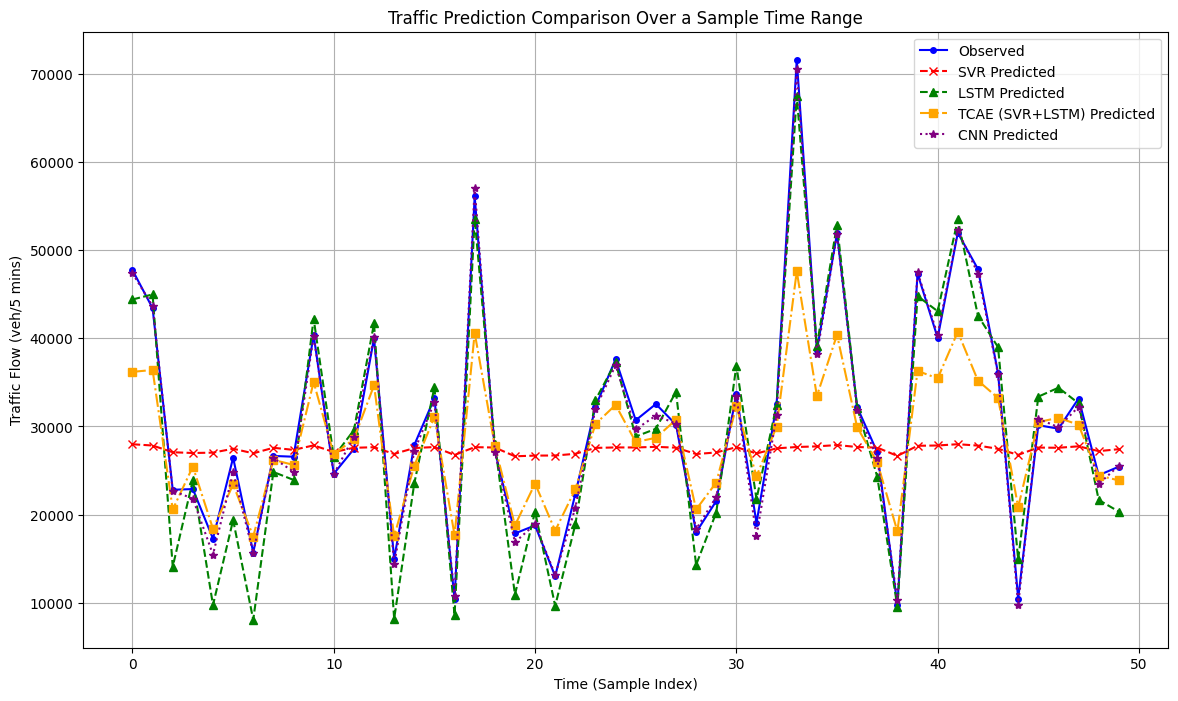

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time range for visualization (e.g., first 50 test samples)
time_range = 50
time_axis = range(time_range)

# Prepare observed values and predictions for the plot
observed_values = y_test[:time_range]
svr_predictions = y_pred_svr[:time_range]
lstm_predictions = y_pred_lstm_tuned[:time_range]
svr_lstm_predictions = y_pred_svr_lstm[:time_range]  # SVR + LSTM combination
cnn_predictions = y_pred_cnn[:time_range]

# Plotting observed values and predictions
plt.figure(figsize=(14, 8))
plt.plot(time_axis, observed_values, label='Observed', color='blue', marker='o', markersize=4, linestyle='-')
plt.plot(time_axis, svr_predictions, label='SVR Predicted', color='red', marker='x', linestyle='--')
plt.plot(time_axis, lstm_predictions, label='LSTM Predicted', color='green', marker='^', linestyle='--')
plt.plot(time_axis, svr_lstm_predictions, label='TCAE (SVR+LSTM) Predicted', color='orange', marker='s', linestyle='-.')
plt.plot(time_axis, cnn_predictions, label='CNN Predicted', color='purple', marker='*', linestyle=':')

plt.xlabel("Time (Sample Index)")
plt.ylabel("Traffic Flow (veh/5 mins)")
plt.title("Traffic Prediction Comparison Over a Sample Time Range")
plt.legend()
plt.grid(True)
plt.show()

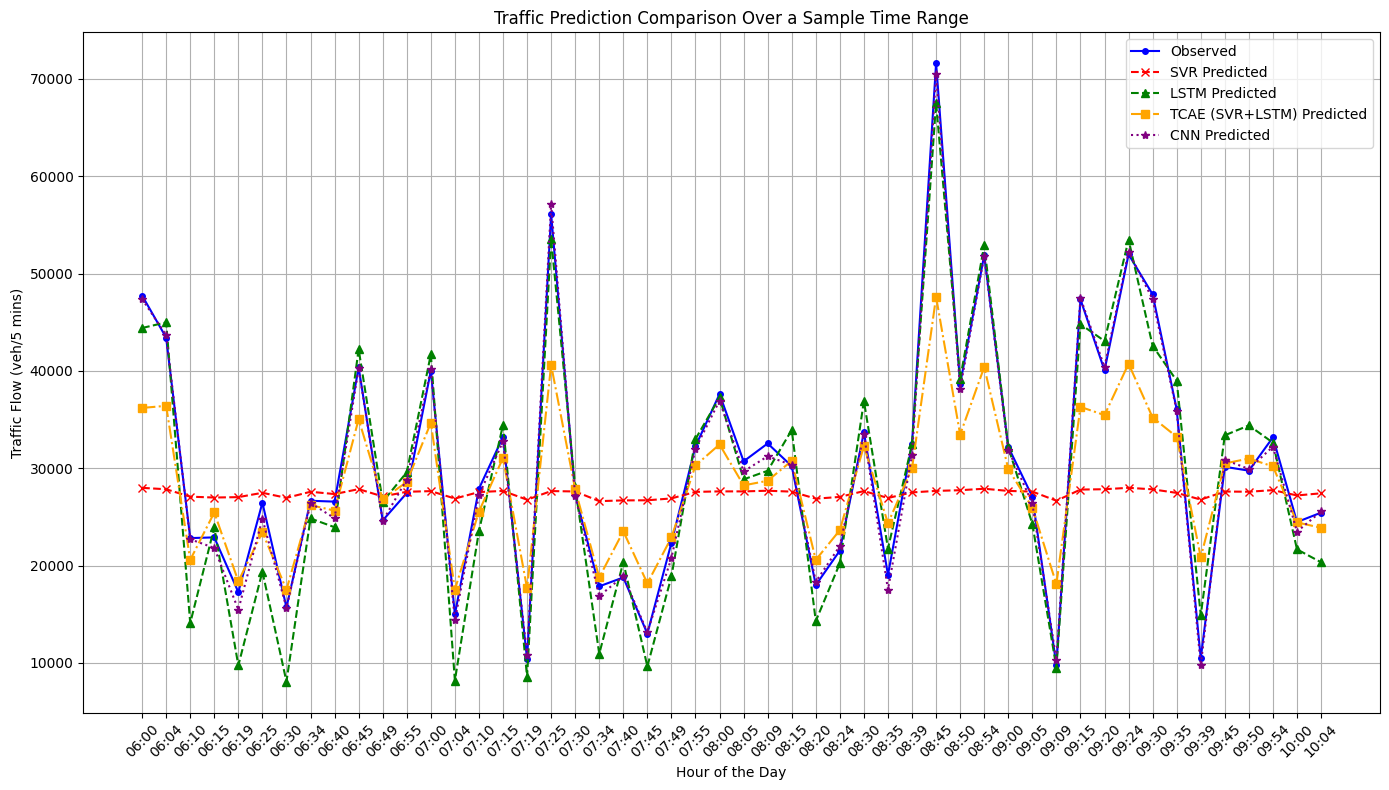

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
time_range = 50  # Number of samples
interval_minutes = 5
start_hour = 6  # Starting hour in 24-hour format (e.g., 6 for 6:00 AM)

# Generate hour labels based on 5-minute intervals
time_axis_hours = [(start_hour + i * interval_minutes / 60) % 24 for i in range(time_range)]
time_labels = [f"{int(hour):02}:{int((hour % 1) * 60):02}" for hour in time_axis_hours]

# Prepare observed values and predictions for the plot
observed_values = y_test[:time_range]
svr_predictions = y_pred_svr[:time_range]
lstm_predictions = y_pred_lstm_tuned[:time_range]
svr_lstm_predictions = y_pred_svr_lstm[:time_range]  # SVR + LSTM combination
cnn_predictions = y_pred_cnn[:time_range]

# Plotting observed values and predictions
plt.figure(figsize=(14, 8))
plt.plot(time_labels, observed_values, label='Observed', color='blue', marker='o', markersize=4, linestyle='-')
plt.plot(time_labels, svr_predictions, label='SVR Predicted', color='red', marker='x', linestyle='--')
plt.plot(time_labels, lstm_predictions, label='LSTM Predicted', color='green', marker='^', linestyle='--')
plt.plot(time_labels, svr_lstm_predictions, label='TCAE (SVR+LSTM) Predicted', color='orange', marker='s', linestyle='-.')
plt.plot(time_labels, cnn_predictions, label='CNN Predicted', color='purple', marker='*', linestyle=':')

# Aesthetics
plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Flow (veh/5 mins)")
plt.title("Traffic Prediction Comparison Over a Sample Time Range")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit rotated labels

plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(true_values, predictions):
    """
    Calculates RMSE, MAE, and R-squared metrics.

    Parameters:
    - true_values: array-like, actual observed values
    - predictions: array-like, model's predicted values

    Returns:
    - A dictionary containing RMSE, MAE, and R-squared values
    """
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predictions))

    # Calculate MAE
    mae = mean_absolute_error(true_values, predictions)

    # Calculate R-squared
    r_squared = r2_score(true_values, predictions)

    return {"RMSE": rmse, "MAE": mae, "R-squared": r_squared}

# Define true values and predictions for each model/ensemble (example placeholders)
true_values = y_test  # Ground truth values from the test set

# Initialize a dictionary to store the metrics for each model across multiple runs


# Assuming y_pred_svr, y_pred_ha, y_pred_lstm_tuned, y_pred_svr_ha, y_pred_svr_lstm, etc., are already defined
results = {
    "SVR": calculate_metrics(true_values, y_pred_svr),
    "HA": calculate_metrics(true_values, y_pred_ha),
    "LSTM": calculate_metrics(true_values, y_pred_lstm_tuned),
    "CNN":calculate_metrics(true_values, y_pred_cnn),
    "SVR + HA": calculate_metrics(true_values, y_pred_svr_ha),
    "SVR + LSTM": calculate_metrics(true_values, y_pred_svr_lstm),
    "HA + LSTM": calculate_metrics(true_values, y_pred_ha_lstm),
    "SVR + LSTM + HA": calculate_metrics(true_values, y_pred_svr_lstm_ha),
}

# Collect metrics across all models
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R-squared'] for metrics in results.values()]

# Calculate standard deviation for each metric
rmse_std = np.std(rmse_values)
mae_std = np.std(mae_values)
r2_std = np.std(r2_values)

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']}, MAE = {metrics['MAE']}, R-squared = {metrics['R-squared']}")

print("\nStandard Deviations:")
print(f"RMSE std: {rmse_std}")
print(f"MAE std: {mae_std}")
print(f"R-squared std: {r2_std}")

SVR: RMSE = 12772.506157917252, MAE = 10099.988504318966, R-squared = 0.027787100154220257
HA: RMSE = 10494.223622311272, MAE = 8452.706397744036, R-squared = 0.3436888741618661
LSTM: RMSE = 3173.9012271965867, MAE = 2505.09228515625, R-squared = 0.9399662017822266
CNN: RMSE = 853.0884332822711, MAE = 640.2122192382812, R-squared = 0.9956629276275635
SVR + HA: RMSE = 11038.566787309504, MAE = 8931.72630160588, R-squared = 0.27383633056446555
SVR + LSTM: RMSE = 6597.568206726094, MAE = 4931.258563712191, R-squared = 0.7405958527091716
HA + LSTM: RMSE = 5385.4332820862965, MAE = 4213.151471989391, R-squared = 0.8271575404556287
SVR + LSTM + HA: RMSE = 7410.081173125548, MAE = 5811.549065697926, R-squared = 0.6727685259720062

Standard Deviations:
RMSE std: 3821.482578256563
MAE std: 3082.2948725566303
R-squared std: 0.32562196674316496


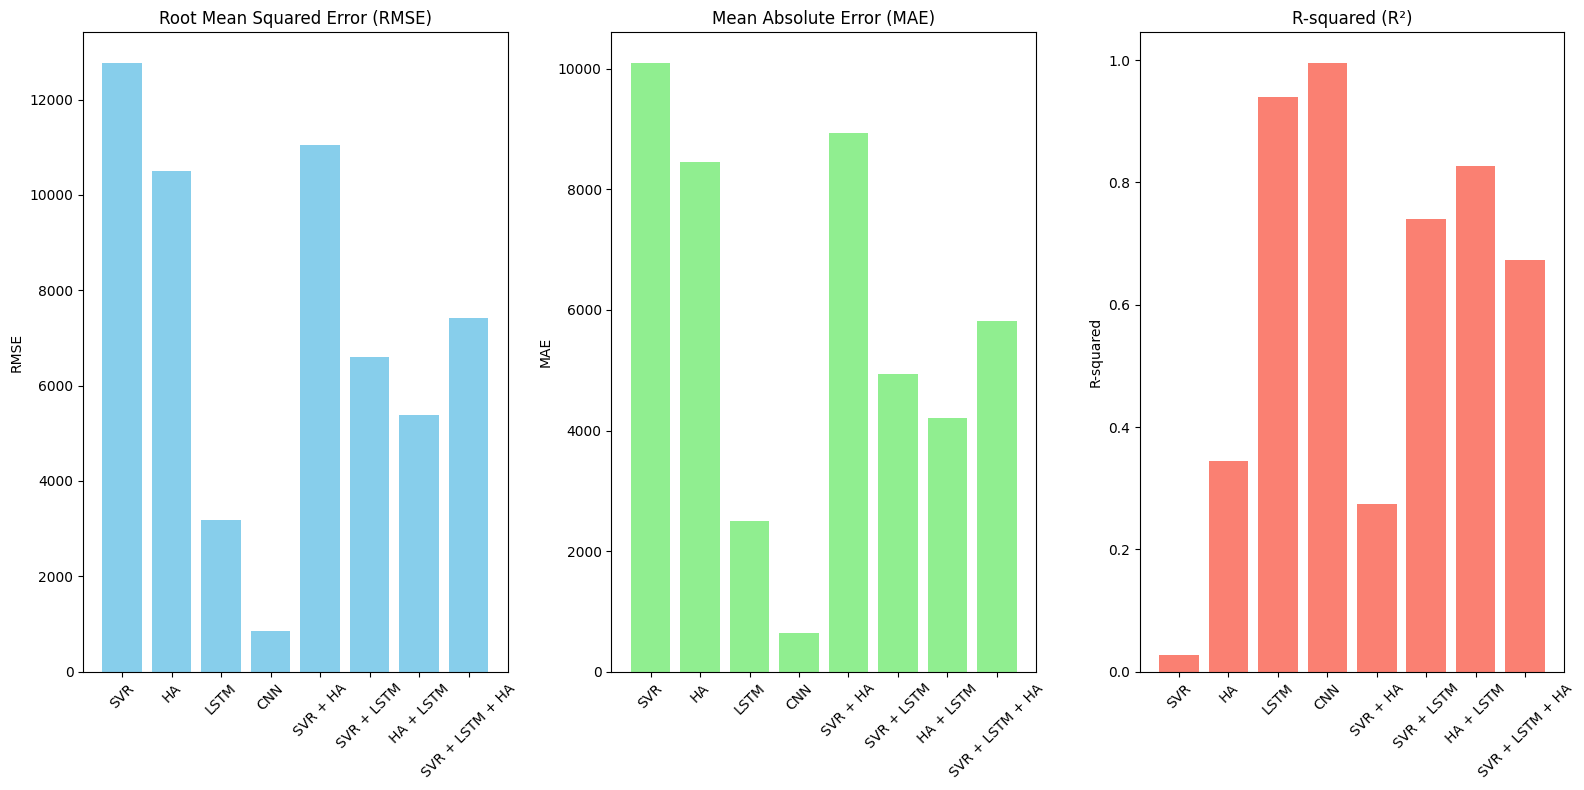

In [58]:
import matplotlib.pyplot as plt

# Organize results in a format suitable for plotting
model_names = list(results.keys())
rmse_values = [metrics['RMSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R-squared'] for metrics in results.values()]

# Set up the figure and subplots
plt.figure(figsize=(16, 8))

# Plot RMSE
plt.subplot(1, 3, 1)
plt.bar(model_names, rmse_values, color='skyblue')
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error (RMSE)")
plt.xticks(rotation=45)

# Plot MAE
plt.subplot(1, 3, 2)
plt.bar(model_names, mae_values, color='lightgreen')
plt.ylabel("MAE")
plt.title("Mean Absolute Error (MAE)")
plt.xticks(rotation=45)

# Plot R-squared
plt.subplot(1, 3, 3)
plt.bar(model_names, r2_values, color='salmon')
plt.ylabel("R-squared")
plt.title("R-squared (R²)")
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [59]:
import requests
import folium
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from geopy.geocoders import Nominatim

# Define the threshold to decide between normal and alternative routes
traffic_volume_threshold = 30000

# Initialize geolocator
geolocator = Nominatim(user_agent="myGeopyApp")

# Function to get coordinates
def get_coordinates(location_name):
    location = geolocator.geocode(location_name)
    if location:
        return [location.latitude, location.longitude]
    else:
        raise ValueError(f"Location '{location_name}' not found")


# Function to calculate metrics
def calculate_metrics(true_values, predictions):
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    mae = mean_absolute_error(true_values, predictions)
    r_squared = r2_score(true_values, predictions)
    return {"RMSE": rmse, "MAE": mae, "R-squared": r_squared}

# Assuming y_test and model predictions (y_pred_*) are already defined
results = {
    "SVR": calculate_metrics(y_test, y_pred_svr),
    "HA": calculate_metrics(y_test, y_pred_ha),
    "LSTM": calculate_metrics(y_test, y_pred_lstm_tuned),
    "SVR + HA": calculate_metrics(y_test, y_pred_svr_ha),
    "SVR + LSTM": calculate_metrics(y_test, y_pred_svr_lstm),
    "HA + LSTM": calculate_metrics(y_test, y_pred_ha_lstm),
    "SVR + LSTM + HA": calculate_metrics(y_test, y_pred_svr_lstm_ha),
}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']}, MAE = {metrics['MAE']}, R-squared = {metrics['R-squared']}")


# Mapbox access token
api_key = "pk.eyJ1IjoidmlzaGFscmsiLCJhIjoiY20zM2I0d3UzMTljejJrcjMxbm5qY3loeiJ9.A9CAu8GyGGxkHkq0AYfDDQ"

# Define start and end locations
start_location = "Basavanagudi, Bangalore"
end_location = "Whitefield, Bangalore"
start_coords = get_coordinates(start_location)
end_coords = get_coordinates(end_location)

# Function to display route on map using Mapbox API and Folium
def display_route_on_map(route_type="normal"):
    # Select route profile based on type
    route_profile = "driving-traffic" if route_type == "alternative" else "driving"
    url = (
        f"https://api.mapbox.com/directions/v5/mapbox/{route_profile}/"
        f"{start_coords[1]},{start_coords[0]};{end_coords[1]},{end_coords[0]}"
        f"?geometries=geojson&alternatives=true&access_token={api_key}"
    )

    # Get route data
    response = requests.get(url)
    route_data = response.json()

    # Extract route coordinates for visualization
    route_coords = route_data['routes'][0]['geometry']['coordinates']
    route_coords = [[lat, lon] for lon, lat in route_coords]  # Reverse for folium format

    # Create map centered around start location
    m = folium.Map(location=start_coords, zoom_start=13)

    # Add start and end markers
    folium.Marker(start_coords, tooltip="Start - Indiranagar").add_to(m)
    folium.Marker(end_coords, tooltip="End - Koramangala").add_to(m)

    # Draw the route on the map
    folium.PolyLine(route_coords, color="blue" if route_type == "normal" else "red", weight=5, opacity=0.8).add_to(m)

    # Display the map
    return m


lstm_model = y_pred_lstm_tuned
svr_model= y_pred_svr
ha_model = y_pred_ha
svr_ha_model =y_pred_svr_lstm
ha_lstm_model = y_pred_ha_lstm
svr_lstm_ha = y_pred_svr_lstm_ha


# Select a single traffic score for demonstration
traffic_volume = svr_model[0]

# Determine the route type based on the traffic score
route_type = "alternative" if traffic_volume > traffic_volume_threshold else "normal"
print(f"Traffic Score = {traffic_volume}, Route Type: {route_type}")

# Display the route on the map based on traffic score
m = display_route_on_map(route_type=route_type)
display(m)  # Display the map in Jupyter/Kaggle notebook

SVR: RMSE = 12772.506157917252, MAE = 10099.988504318966, R-squared = 0.027787100154220257
HA: RMSE = 10494.223622311272, MAE = 8452.706397744036, R-squared = 0.3436888741618661
LSTM: RMSE = 3173.9012271965867, MAE = 2505.09228515625, R-squared = 0.9399662017822266
SVR + HA: RMSE = 11038.566787309504, MAE = 8931.72630160588, R-squared = 0.27383633056446555
SVR + LSTM: RMSE = 6597.568206726094, MAE = 4931.258563712191, R-squared = 0.7405958527091716
HA + LSTM: RMSE = 5385.4332820862965, MAE = 4213.151471989391, R-squared = 0.8271575404556287
SVR + LSTM + HA: RMSE = 7410.081173125548, MAE = 5811.549065697926, R-squared = 0.6727685259720062


Traffic Score = 27986.667512080254, Route Type: normal
